## Testing environment

Little environment used to test how to train a NN on learning a correction over two different sine waves with a dampening factor

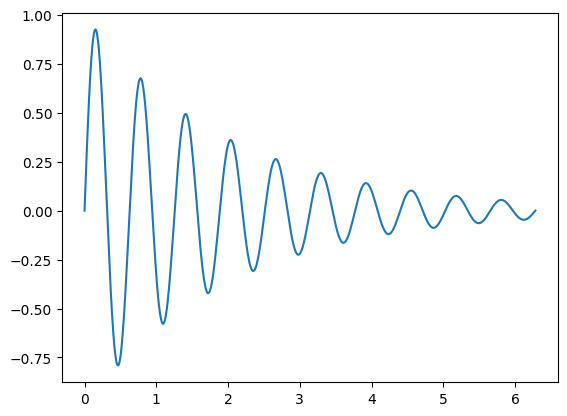

In [8]:
# Little function to create a sine wave where the parameters are the frequency and the damping factor

import numpy as np
import matplotlib.pyplot as plt

def sine_wave(frequency, damping_factor):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(frequency * x) * np.exp(-damping_factor * x)
    plt.plot(x, y)
    plt.show()

sine_wave(10, 0.5)

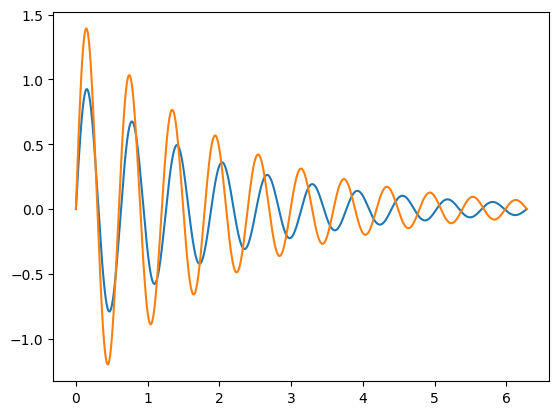

In [14]:
# same function but with also the amplitude as a parameter
def sine_wave(x, frequency, damping_factor, amplitude):
    y = amplitude * np.sin(frequency * x) * np.exp(-damping_factor * x)
    return y

x = np.linspace(0, 2*np.pi, 1000)
frequency = 10
damping_factor = 0.5
amplitude = 1

y1 = sine_wave(x, frequency, damping_factor, amplitude)
y2 = sine_wave(x, frequency + 0.5, damping_factor, 0.5+ amplitude)
 
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()


In [ ]:
#build a Fully connected neural network to predict the difference between the two sine waves
import torch
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)

In [4]:
# I have a beam with x length 10, y length 1 and z length 1. The origin is at the center of the end of the beam.
# I want to divide the beam by subdividing the x axis in 25 parts, the y axis in 10 parts and the z axis in 10 parts.

# write in a text file the coordinates of the points that divide the beam
import numpy as np

x = np.linspace(0, 10, 25)
y = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 10)

#save the file in the home directory
with open('beam_points.txt', 'w') as f:
    for k in z:
        for j in y:
            for i in x:
                f.write(f'{i} {j} {k}\n')

#move the file to the home directory
import shutil
shutil.move('beam_points.txt', '/home/bonni/beam_points.txt')




'/home/bonni/beam_points.txt'

In [5]:
x = np.linspace(1, 4, 11)

y = np.linspace(4, 7, 22)

z = np.linspace(7, 9, 33)

print((x, y, z))

(array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]), array([4.        , 4.14285714, 4.28571429, 4.42857143, 4.57142857,
       4.71428571, 4.85714286, 5.        , 5.14285714, 5.28571429,
       5.42857143, 5.57142857, 5.71428571, 5.85714286, 6.        ,
       6.14285714, 6.28571429, 6.42857143, 6.57142857, 6.71428571,
       6.85714286, 7.        ]), array([7.    , 7.0625, 7.125 , 7.1875, 7.25  , 7.3125, 7.375 , 7.4375,
       7.5   , 7.5625, 7.625 , 7.6875, 7.75  , 7.8125, 7.875 , 7.9375,
       8.    , 8.0625, 8.125 , 8.1875, 8.25  , 8.3125, 8.375 , 8.4375,
       8.5   , 8.5625, 8.625 , 8.6875, 8.75  , 8.8125, 8.875 , 8.9375,
       9.    ]))


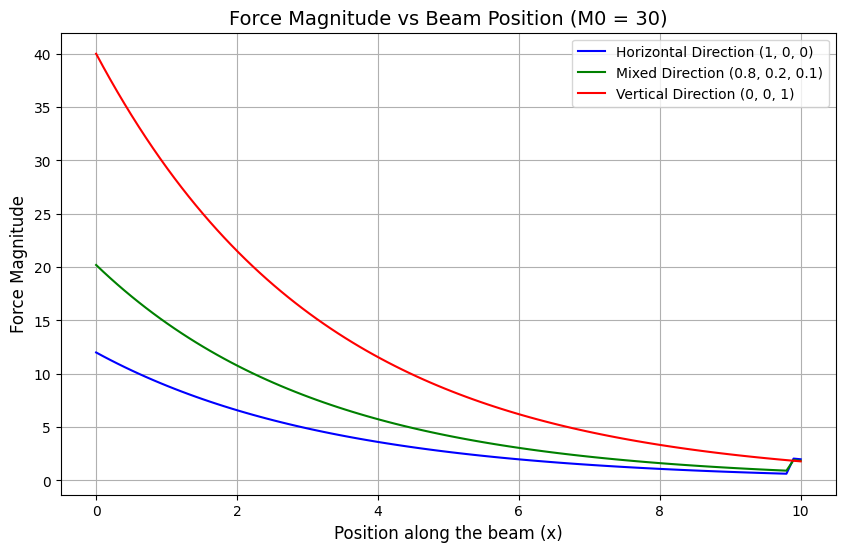

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function from the previous code
def compute_force(x_pos, dir_vector, M0=1.0, alpha=0.3, gamma_x=0.7, gamma_y=0.1):
    """
    Compute the force vector with decay along the beam.

    Parameters:
        x_pos (float): Position along the beam (0 to 10 meters).
        dir_vector (tuple): Unit vector components (x, y, z) of the force direction.
        M0 (float): Initial force magnitude.
        alpha (float): Exponential decay rate.
        gamma_x (float): Horizontal force damping factor.
        gamma_y (float): Vertical force damping factor.

    Returns:
        np.ndarray: The force vector (Fx, Fy, Fz).
    """
    # Extract direction components
    dir_x, dir_y, dir_z = dir_vector

    # Ensure the direction vector is a unit vector
    magnitude = np.sqrt(dir_x**2 + dir_y**2)
    if magnitude == 0:
        raise ValueError("Direction vector cannot be zero.")
    dir_x, dir_y = dir_x / magnitude, dir_y / magnitude

    # Exponential decay
    exp_decay = M0 * np.exp(-alpha * x_pos)

    # Horizontal damping (based on x-direction), only if not at the end of the beam
    horizontal_damping = 0 if x_pos > 9.8 else gamma_x * abs(dir_x) 

    # Vertical damping (based on y-direction)
    vertical_damping = gamma_y * abs(dir_y) * x_pos / 10

    # Combine the damping factors
    damping_factor = 1 - horizontal_damping - vertical_damping
    damping_factor = max(0, damping_factor)  # Ensure the damping factor is not negative

    # Compute the magnitude of the force
    force_magnitude = exp_decay * damping_factor

    # Compute the force vector
    force_vector = force_magnitude * np.array([dir_x, dir_y, 0])

    return force_vector

# Settings
M0 = 40
x_positions = np.linspace(0, 10, 100)

# Case 1: Mostly horizontal force
horizontal_direction = (1, 0, 0)
forces_horizontal = [np.linalg.norm(compute_force(x, horizontal_direction, M0)) for x in x_positions]

# Case 2: Mixed direction force
mixed_direction = (0.5, 0.5, 0)
forces_mixed = [np.linalg.norm(compute_force(x, mixed_direction, M0)) for x in x_positions]

# Case 3: Mostly vertical force
vertical_direction = (0, 1, 0)
forces_vertical = [np.linalg.norm(compute_force(x, vertical_direction, M0)) for x in x_positions]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_positions, forces_horizontal, label="Horizontal Direction (1, 0, 0)", color="blue")
plt.plot(x_positions, forces_mixed, label="Mixed Direction (0.8, 0.2, 0.1)", color="green")
plt.plot(x_positions, forces_vertical, label="Vertical Direction (0, 0, 1)", color="red")
plt.title("Force Magnitude vs Beam Position (M0 = 30)", fontsize=14)
plt.xlabel("Position along the beam (x)", fontsize=12)
plt.ylabel("Force Magnitude", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
